This is a notebook to pull down all the information for figure 3 (ncbi hits). The design is to compair between each sample (barcode) instead of each flowcell as they sequenced the same thing. Therefore I just pulled all the ncbi hits for each flowcell for each barcode and merged them together according to the barcode.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
import argparse
from ete3 import NCBITaxa 


In [2]:
ncbi = NCBITaxa()


In [3]:
# use argparse to do this
#BASEDIR = args.BASEDIR
BASEDIR = '/home/yiheng/test'

# here we define the folder name of the dataframe it created by capturing the folder from the BASDIR
folder_name = os.path.basename(BASEDIR)
#column_name = folder_name.split('_')[-1]

In [4]:
# first check if the analysis folder is there
folder_list = 'analysis  basecalled_data  scripts  tracking  workspace'.split(' ')
for x in range(0,folder_list.count('')):
    folder_list.remove('')
#fix this test
if not set(os.listdir(os.path.abspath(BASEDIR))) == set (folder_list):
    print("Something wrong with basefolder. check it please.")

In [5]:
# get the dataframe there
dataframe = os.path.join(BASEDIR, 'analysis', 'summary_df_%s.tab' % folder_name)
sum_df = pd.read_csv(dataframe, sep='\t')

/home/yiheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
sum_df[sum_df.pident_nt > 0].head()

read_id passes_filtering  \
25  8b7e2a43-32ae-419c-9326-2cb14eaf1535             True   
28  cb3af2d3-7fe3-4bac-8565-0ae34344af18             True   
29  d1f8a29b-fcc9-4ff8-812d-9b4cedf53116             True   
42  b50226e5-4abc-4da9-929f-b92f0e7c9eac             True   
46  1336f3a8-cbe2-4471-9ad4-b5e65e9301b8             True   

   sequence_length_template mean_qscore_template barcode_arrangement  \
25                      569                 9.69        unclassified   
28                      982                8.334           barcode06   
29                      631                9.865           barcode05   
42                      577                7.061        unclassified   
46                      563               10.385           barcode06   

   barcode_score kit variant  pc_survived  \
25          36.4  NB    var1         True   
28       94.4615  NB    var1         True   
29       86.9231  NB    var1         True   
42        53.641  NB    var1         True   
46       78.8718  NB    var1         True   

                               qseqid_nt                          sseqid_nt  \
25  8b7e2a43-32ae-419c-9326-2cb14eaf1535       gi|380353348|emb|HE681722.1|   
28  cb3af2d3-7fe3-4bac-8565-0ae34344af18       gi|354543245|emb|HE605203.1|   
29  d1f8a29b-fcc9-4ff8-812d-9b4cedf53116  gi|1069598653|ref|XM_018323264.1|   
42  b50226e5-4abc-4da9-929f-b92f0e7c9eac      gi|226874808|ref|NG_011878.1|   
46  1336f3a8-cbe2-4471-9ad4-b5e65e9301b8        gi|83764382|dbj|AP007150.1|   

        evalue_nt  length_nt  pident_nt  nident_nt       sacc_nt staxids_nt  \
25   0.000000e+00      511.0      90.02      460.0      HE681722     273371   
28  5.000000e-167      501.0      89.22      447.0      HE605203       5480   
29  5.000000e-105      383.0      86.42      331.0  XM_018323264      33203   
42   2.000000e-59      276.0      84.06      232.0     NG_011878       9606   
46   0.000000e+00      469.0      92.75      435.0      AP007150     510516   

                 scomnames_nt  read_length_pc  
25      Candida orthopsilosis           569.0  
28       Candida parapsilosis           904.0  
29  Purpureocillium lilacinum           560.0  
42               Homo sapiens           508.0  
46   Aspergillus oryzae RIB40           474.0

In [7]:
# fills the nan with T/F for easier handling
#sum_df.sseqid_rg.fillna(False, inplace=True)
sum_df.sseqid_nt.fillna(False, inplace=True)
# filter out the rg blast hit
#ntblasthit_reads = sum_df[(sum_df.sseqid_rg == False) & (sum_df.sseqid_nt != False) & (sum_df.passes_filtering == True) & (sum_df.pc_survived == True) & (sum_df.nl_survived == True)]
total_reads = sum_df[(sum_df.sseqid_nt != False) & (sum_df.passes_filtering == True) & (sum_df.pc_survived == True)]
ntblasthit_reads = total_reads[total_reads.sseqid_nt != False]
pd.set_option('display.max_columns', None)

#Removing unncessary columns from joint_NCBI_df_taxonomy
#I hard coded to select as it depends on what information you need
for columns in ['passes_filtering', 'sequence_length_template',
       'mean_qscore_template', 'barcode_score', 'kit',
       'variant', 'pc_survived', 'qseqid_nt', 'sseqid_nt', 'evalue_nt',
       'length_nt', 'pident_nt', 'nident_nt', 'sacc_nt', 'read_length_pc']:
    del total_reads[columns] 
# keep the common name in to filter the human out

In [8]:
###########This block for barcodes order
# now everything left is what we want to plot out
# arrange different barcodes
# REMEMBER: This need to be manual check:

total_reads_barcode05 = total_reads[total_reads.barcode_arrangement == 'barcode05']
total_reads_barcode06 = total_reads[total_reads.barcode_arrangement == 'barcode06']
total_reads_barcode07 = total_reads[total_reads.barcode_arrangement == 'barcode07']

In [9]:
# now just filter out all the reads that are not going to used for ploting
barcode05_total = total_reads[total_reads.barcode_arrangement.str.contains('barcode05')]
barcode06_total = total_reads[total_reads.barcode_arrangement.str.contains('barcode06')]
barcode07_total = total_reads[total_reads.barcode_arrangement.str.contains('barcode07')]

# now concat them together. but remember that the index has to change to add the column for ncbi taxa
total_reads_filtered_barcodes = pd.concat([barcode05_total, 
                                           barcode06_total, 
                                           barcode07_total], ignore_index=True)

In [10]:
total_reads_filtered_barcodes.staxids_nt.fillna(False, inplace=True)
ntblasthit_reads_filtered_barcodes = total_reads_filtered_barcodes[(total_reads_filtered_barcodes.staxids_nt != False)]

In [11]:
ntblasthit_reads_barcode07_nohuman = ntblasthit_reads_filtered_barcodes[(ntblasthit_reads_filtered_barcodes.scomnames_nt != 'Homo sapiens') & (ntblasthit_reads_filtered_barcodes.barcode_arrangement == 'barcode07')]
ntblasthit_reads_barcode07_nohuman = ntblasthit_reads_barcode07_nohuman.reset_index(drop=True)

In [12]:
# as the concate before will result the staxid into a string
# so now change the string back to float so it can be recognized by the NCBITaxa
for taxid in ntblasthit_reads_barcode07_nohuman['staxids_nt']:
    if ';' in str(taxid):
        taxid = taxid.split(';')[0]

    else:
        pass
    float(taxid)

In [13]:
#Function to generate taxonomy columns based on NCBITaxa results for NCBI hit dataframe, 
def search_rank_output_name_append_column(df, staxid_column, rank_search):
    """Input df, staxid_column from same df and rank_search (a desired taxonomic rank 
    from each staxid's lineage), outputs taxonomic name corresponding to rank_search or 'Unclassified' if
    unavailable and appends to df row by row"""
    rank_list = []
    for read_index in range(0, len(staxid_column)):
        taxid = ''
        if ';' in str(staxid_column[read_index]):
            taxid = staxid_column[read_index].split(';')[0]
################# BE CAREFUL HERE !!! #######################################
            df.loc[staxid_column =='71426;73839', 'staxids_nt'] = 73839
        else:
            taxid = staxid_column[read_index]
        
        
        taxid_lineage = ''
        taxid_lineage = ncbi.get_lineage(taxid)
        
        names = ''
        names = ncbi.get_taxid_translator(taxid_lineage)
        
        ranks = ''
        ranks = ncbi.get_rank(taxid_lineage) #Dict
        
        ranks2names = ''
        ranks2names = {ranks[k]:names[k] for k in names.keys() & ranks}
        
        if rank_search in ranks2names.keys():
            rank_list.append(ranks2names[rank_search])#if rank in dict, print name
        else:
            rank_list.append('Unclassified')
    df[rank_search] = rank_list
# NOTE: Appending is always slow, try and find a better way e.g df.apply to a column based on staxids column


In [14]:
ncbi.get_lineage(291364)
ncbi.get_lineage(1635066)
ncbi.get_lineage(72029)
ncbi.get_lineage(251300)
ncbi.get_lineage(332405)
ncbi.get_lineage(1916993)
ncbi.get_lineage(595593)
ncbi.get_lineage(71426)
ncbi.get_lineage(291364)
ncbi.get_lineage(278968)
ncbi.get_lineage(38483)
ncbi.get_lineage(112484)
print(ncbi.get_lineage(9606))

/home/yiheng/anaconda3/lib/python3.6/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:240: UserWarning: taxid 291364 was translated into 2231603
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/home/yiheng/anaconda3/lib/python3.6/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:240: UserWarning: taxid 1635066 was translated into 1508258
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/home/yiheng/anaconda3/lib/python3.6/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:240: UserWarning: taxid 72029 was translated into 1836592
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/home/yiheng/anaconda3/lib/python3.6/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:240: UserWarning: taxid 251300 was translated into 332405
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/home/yiheng/anaconda3/lib/python3.6/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:240: U

[1, 131567, 2759, 33154, 33208, 6072, 33213, 33511, 7711, 89593, 7742, 7776, 117570, 117571, 8287, 1338369, 32523, 32524, 40674, 32525, 9347, 1437010, 314146, 9443, 376913, 314293, 9526, 314295, 9604, 207598, 9605, 9606]


/home/yiheng/anaconda3/lib/python3.6/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:240: UserWarning: taxid 278968 was translated into 2025498
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/home/yiheng/anaconda3/lib/python3.6/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:240: UserWarning: taxid 38483 was translated into 1436886
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/home/yiheng/anaconda3/lib/python3.6/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:240: UserWarning: taxid 112484 was translated into 1431917
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))


In [15]:
ncbi.get_rank([1969666])

{}

In [16]:
ncbi.get_taxid_translator('40674')

{6: 'Azorhizobium', 7: 'Azorhizobium caulinodans'}

In [17]:
# see above, some taxids are changed (translated) sometimes, which is probably due to the version of the local nt database.
# therefore, here I mannualy adjusted all the taxids that has been changed to the new numbers.

ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='291364', 'staxids_nt'] = 2231603
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='1635066', 'staxids_nt'] = 1508258
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='72029', 'staxids_nt'] = 1836592
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='251300', 'staxids_nt'] = 332405
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='652050', 'staxids_nt'] = 2204306
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='1916993', 'staxids_nt'] = 303
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='595593', 'staxids_nt'] = 656366
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='71426;73839', 'staxids_nt'] = 73839
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='278968', 'staxids_nt'] = 2025498
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='38483', 'staxids_nt'] = 1436886
ntblasthit_reads_barcode07_nohuman.loc[ntblasthit_reads_barcode07_nohuman.staxids_nt=='112484', 'staxids_nt'] = 1431917
# the taxdb was changed and this taxid was removed and untracked
ntblasthit_reads_barcode07_nohuman = ntblasthit_reads_barcode07_nohuman[ntblasthit_reads_barcode07_nohuman.staxids_nt!='1969666']
ntblasthit_reads_barcode07_nohuman = ntblasthit_reads_barcode07_nohuman.reset_index(drop=True)
#ntblasthit_reads_filtered_barcodes.loc[ntblasthit_reads_filtered_barcodes.staxids_nt=='278968', 'staxids_nt'] = 2025498
#ntblasthit_reads_filtered_barcodes.loc[ntblasthit_reads_filtered_barcodes.staxids_nt=='71426', 'staxids_nt'] = 1915362


In [18]:
ntblasthit_reads_barcode07_nohuman.index[ntblasthit_reads_barcode07_nohuman.staxids_nt.str.contains('811799') == True]

Int64Index([], dtype='int64')

In [19]:
ntblasthit_reads_barcode07_nohuman[ntblasthit_reads_barcode07_nohuman.staxids_nt.str.contains('1431917') == True]

Empty DataFrame
Columns: [read_id, barcode_arrangement, staxids_nt, scomnames_nt]
Index: []

In [20]:
#ntblasthit_reads_filtered_barcodes_added_TaxaRank = ntblasthit_reads_filtered_barcodes.copy()
# pretty slow
rank_list = ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
for rank in rank_list:
    search_rank_output_name_append_column(ntblasthit_reads_barcode07_nohuman, 
                                          ntblasthit_reads_barcode07_nohuman.staxids_nt, 
                                          rank)

In [21]:
# add the flowcell column just in case
#ntblasthit_reads_filtered_barcodes = ntblasthit_reads_filtered_barcodes.assign(Flowcell = column_name)
#total_reads_filtered_barcodes = total_reads_filtered_barcodes.assign(Flowcell = column_name)

In [23]:
#total_reads_filtered_barcodes.to_csv(r'/home/yiheng/analysis/WGS/%s_totaltaxa.tab' % column_name, header=column_name, index=None, sep='\t')
ntblasthit_reads_barcode07_nomammal = ntblasthit_reads_barcode07_nohuman[ntblasthit_reads_barcode07_nohuman['class'] != 'Mammalia']
ntblasthit_reads_barcode07_nomammal = ntblasthit_reads_barcode07_nomammal.reset_index(drop = True)
ntblasthit_reads_barcode07_nomammal.to_csv(r'/home/yiheng/test/analysis/%s_barcode07_nomammal_nttaxa.tab' % folder_name, header='clinical_2', index=None, sep='\t')

In [18]:
#Defines a function to make manual adjustments to the NCBI taxonomic sorting
def manually_adjust_ncbi_taxonomy(rank_select, entry_select, ranks_to_edit, new_entry):
    """Select dataframe entries to edit by a specific rank (rank_select) 
    and entry related to that rank (entry_select), 
    provide a list of ranks to edit for those selected entries (ranks_to_edit),
    replace these ranks with a new entry (new_entry)"""
    if entry_select in list(ntblasthit_reads_filtered_barcodes[rank_select].unique()):
        selection = (ntblasthit_reads_filtered_barcodes[rank_select] == entry_select)
        selected_tax_ranks = ranks_to_edit
        for ranks in selected_tax_ranks:
            ntblasthit_reads_filtered_barcodes[ranks][selection] = new_entry

In [19]:
#manually_adjust_ncbi_taxonomy('species', 
#                            'Cloning vector lambda TXF97', 
#                            ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus'], 
#                            'Cloning vector lambda TXF97')

#manually_adjust_ncbi_taxonomy('superkingdom', 
#                            'Viruses', 
#                            ['phylum', 'class'], 
#                            'dsDNA viruses, no RNA stage')

In [33]:
#count pivot table of dataframe with taxonomic columns: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_ncbi_taxonomy_pivot(tax_df, rank, bcs, num):
    """From tax_df, generate a pivot table listing num rank counts, sorted by bcs"""
    pivot_table = tax_df.pivot_table(values='read_id', 
                                            index=rank, 
                                            columns='barcode_arrangement', 
                                            aggfunc='count', 
                                            fill_value=0)
    pivot_table.columns.name = None
    pivot_table = pivot_table.sort_values(bcs, axis=0, ascending=False).head(n=num)
    return pivot_table

In [34]:
generate_ncbi_taxonomy_pivot(ntblasthit_reads_filtered_barcodes, 'genus','barcode07', 10)

KeyError: 'genus'

In [22]:
total_no_of_each_barcode_df = pd.DataFrame({'barcode01':len(total_reads_filtered_barcodes[total_reads_filtered_barcodes.barcode_arrangement == 'barcode01']),
                                            'barcode02':len(total_reads_filtered_barcodes[total_reads_filtered_barcodes.barcode_arrangement == 'barcode02']),
                                            'barcode03':len(total_reads_filtered_barcodes[total_reads_filtered_barcodes.barcode_arrangement == 'barcode03']),
                                            'barcode04':len(total_reads_filtered_barcodes[total_reads_filtered_barcodes.barcode_arrangement == 'barcode04']),
                                            'barcode05':len(total_reads_filtered_barcodes[total_reads_filtered_barcodes.barcode_arrangement == 'barcode05'])}, index = [0])

In [23]:
total_no_of_each_barcode_df

barcode01  barcode02  barcode03  barcode04  barcode05
0      42133      70120      30148       2443       4597

In [24]:
pivot_df = generate_ncbi_taxonomy_pivot(ntblasthit_reads_filtered_barcodes, 'genus','barcode04',10)

In [25]:
# % pivot table of dataframe with taxonomic columns: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_ncbi_taxonomy_pivot_pc(tax_df, rank, bcs, num):
    """From tax_df, generate a pivot table listing num rank %, sorted ascending by bcs"""
    pivot_table_pc = generate_ncbi_taxonomy_pivot(tax_df, rank, bcs, num)
    
    for ind, brcs in enumerate(pivot_table_pc.columns):
        pivot_table_pc[str(brcs) + '%'] = pivot_table_pc[brcs].apply(lambda x: (x / total_no_of_each_barcode_df.iloc[0,ind])*100)
    for brcs in pivot_table_pc.columns:
        if '%' not in brcs:
            pivot_table_pc.drop(brcs, axis=1, inplace=True)
    

    pivot_table_pc2 = pivot_table_pc.sort_values(str(bcs) + '%', axis=0, ascending=False)
    return pivot_table_pc2.applymap(lambda x: '%.3f' % x).head(n=num)

In [26]:
generate_ncbi_taxonomy_pivot_pc(ntblasthit_reads_filtered_barcodes, 'genus', 'barcode03', 20)

barcode01% barcode02% barcode03% barcode04% barcode05%
genus                                                                     
Triticum                 0.000      0.001      0.007      0.000      0.000
Sus                      0.000      0.000      0.003      0.041      0.000
Alternaria               0.009      0.158      0.003      0.041      0.065
Monopterus               0.000      0.000      0.003      0.000      0.000
Panthera                 0.000      0.000      0.003      0.000      0.000
Hordeum                  0.000      0.000      0.003      0.000      0.000
Helobdella               0.000      0.000      0.003      0.000      0.000
Hymenobacter             0.000      0.044      0.003      0.000      0.000
Exophiala                0.000      0.001      0.003      0.000      0.000
Oryzias                  0.000      0.000      0.003      0.000      0.000
Frankia                  0.000      0.000      0.003      0.000      0.000
Sphingomonas             0.000      0.154      0.003      0.000      0.000
Campylobacter            0.000      0.000      0.003      0.041      0.000
Gaeumannomyces           0.000      0.001      0.003      0.000      0.000
Plasmodium               0.000      0.001      0.000      0.000      0.000
Pectobacterium           0.012      0.000      0.000      0.000      0.000
Pseudonocardia           0.000      0.001      0.000      0.000      0.000
Paraphaeosphaeria        0.000      0.006      0.000      0.000      0.000
Pseudomonas              0.185      1.412      0.000      0.655      0.044
Pseudodesulfovibrio      0.000      0.001      0.000      0.000      0.000

In [27]:
#Assesses number of barcodes, generates necessary number of plots (even) and relevant indexing system
ncbiblast_barcodes = list(ntblasthit_reads_filtered_barcodes['barcode_arrangement'].unique())
no_of_subplots = len(ncbiblast_barcodes)+1

In [28]:
#Always 2 columns, bc-count/2 rows 
no_of_subplots_pair = [int(no_of_subplots/2), 2]

#Produce pairs of indices correlating to the coordinates of the subplots
subplot_coordinates = list(product(range(no_of_subplots_pair[0]), range(no_of_subplots_pair[1])))
subplot_coordinates_list = [list(l) for l in subplot_coordinates]
subplot_coordinates_list_rows = [i[0] for i in subplot_coordinates_list]
subplot_coordinates_list_columns = [i[1] for i in subplot_coordinates_list]

fig, ax = plt.subplots(no_of_subplots_pair[1], no_of_subplots_pair[0], figsize=(20, 6))

In [29]:
name_list = ['Stripe rust', 'Septoria tritici blotch', 'Healthy wheat', 'Stripe rust and sptoria tritici blotch', 'Yellow spot']

In [30]:
def get_color(x):
    x = x%10
    return ('#%02X%02X%02X' % (int(plt.cm.tab10.colors[x][0]*255),int(plt.cm.tab10.colors[x][1]*255),int(plt.cm.tab10.colors[x][2]*255)))

def applyTaxPlotStyle(ax_ind1, ax_ind2, bcs, rank, name):
    labels = ''
    labels = tuple(generate_ncbi_taxonomy_pivot_pc(ntblasthit_reads_filtered_barcodes, rank, bcs, 10)[bcs + '%'].index)
    y_pos = ''
    y_pos = np.arange(len(labels))
    sizes = ''
    sizes = tuple([float(i) for i in generate_ncbi_taxonomy_pivot_pc(ntblasthit_reads_filtered_barcodes, rank, bcs, 10)[bcs + '%']])
    
    ax[ax_ind1, ax_ind2].barh(y_pos, sizes, align='center', alpha=0.4, color=get_color(2*ax_ind2 + ax_ind1))
    ax[ax_ind1, ax_ind2].set_yticks(y_pos)
    ax[ax_ind1, ax_ind2].set_yticklabels(labels)
    ax[ax_ind1, ax_ind2].tick_params(top="off", right="off", left="off")
    ax[ax_ind1, ax_ind2].set_xlabel('% Total Reads Hitting NCBI')
    ax[ax_ind1, ax_ind2].set_xticks(range(0, 3),0.2)
    ax[ax_ind1, ax_ind2].set_title(name)
    ax[ax_ind1, ax_ind2].invert_yaxis()
    ax[ax_ind1, ax_ind2].grid(b=None, which='major', axis='x', linestyle='dashed', linewidth=0.2)
    ax[ax_ind1, ax_ind2].annotate('E = 0.00001', 
             xy=(1.06, 0.3), xycoords='axes fraction', fontsize=10, xytext=(-20, -30), textcoords='offset points', 
             ha='right', va='bottom')

    
def generateTaxSubplots(search_rank):
    for ax_ind1, ax_ind2, bcs, name in zip(subplot_coordinates_list_columns, subplot_coordinates_list_rows, ncbiblast_barcodes, name_list):
        applyTaxPlotStyle(ax_ind1, ax_ind2, bcs, search_rank, name)    

    if len(list(ntblasthit_reads_filtered_barcodes['barcode_arrangement'].unique())) != 0:
        plt.delaxes(ax[subplot_coordinates_list_columns[-1], subplot_coordinates_list_rows[-1]])
    
    plt.suptitle('Reads Hitting NCBI Database - % By ' + str(search_rank).title() + ' By Sample', 
             fontsize='x-large',
             y=1.02,
             fontweight="bold")
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.4, hspace=0.4)
    plt.tight_layout()
    
    plt.savefig('/home/yiheng/analysis/WGS/figures/' + 'figure3_%s_%s.png' % (column_name, search_rank), bbox_inches='tight')
    plt.show()
            
            


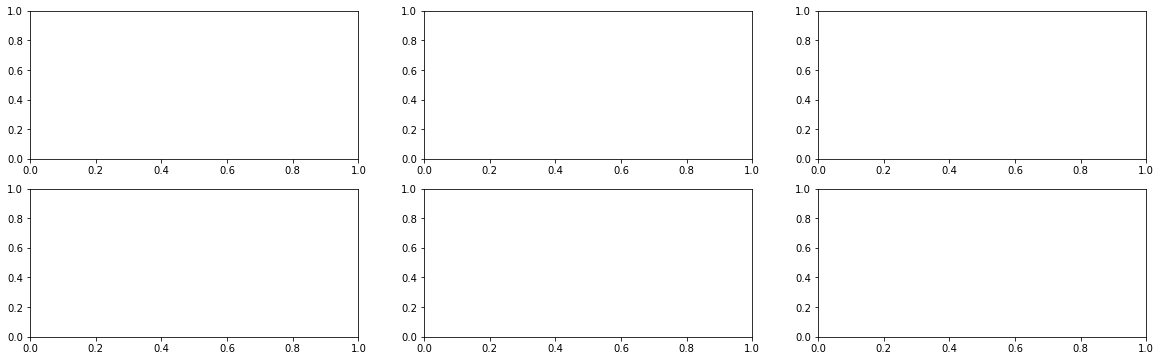

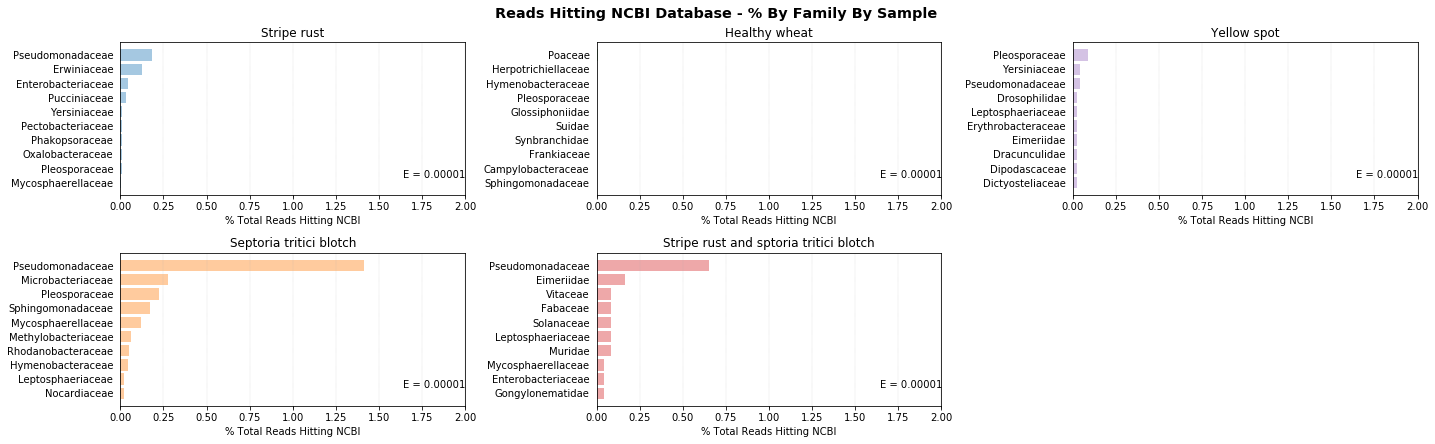

In [31]:
fig, ax = plt.subplots(no_of_subplots_pair[1], no_of_subplots_pair[0], figsize=(20, 6))
generateTaxSubplots('family')

In [ ]:
df1=pd.DataFrame([[1, 2],[10, 1], [3, 4], [7, 8]], columns=['A', 'B'])
df2=pd.DataFrame([[1, 4],[3, 5]], columns=['A', 'B'])
# now replace the location use the index of each df selected from value by .loc function
# first select the value from df2 column A
for values in df2['A'].unique():
    # then locate the position in df1 and replace it by the VALUE of the position in df2
    df1.loc[df1[df1['A'] == (values)].index, 'B'] = df2.loc[df2[df2['A'] == (values)].index, 'B'].values

In [ ]:
df1